<a href="https://colab.research.google.com/github/kireykale/Broadway-Project/blob/master/epropertynepal__DATA_VISUALISATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# eProperty Nepal Data Extraction

In [ ]:
!pip install requests beautifulsoup4 pandas -q
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = 'https://epropertynepal.com/properties?page=1'

In [ ]:
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html>
<head>
<title>Eproperty Nepal | Buy or Sell Property in Nepal </title>
<meta charset="utf-8"/>
<link href="/assets/favicon-b68510f5d13bdc11e040d87bec89e4c5.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="233136783794439" property="fb:app_id">
<meta content="181551330647" property="fb:pages">
<meta content="Want to buy, rent, and property in Nepal? Explore our list of real estate properties (houses, apartments, Business, Flat &amp; lands), Eproperty Nepal is always at you’re. " name="description"/>
<meta content="no one real estate site in Nepal, e-property Nepal, Ghar jagga, Online Properties, Buy or Sell properties, Best properties Nepal" name="keywords"/>
<meta content=" Buy Property in Katmandu Nepal | Property Sell in Nepal" name="title"/>
<meta content="Buy Property,Buy Business,Sale Property,Sale Business,Rent Propert

In [ ]:
soup.title.text

'Eproperty Nepal | Buy or Sell Property in Nepal '

In [ ]:
#------------- SUCCESSFULLY PARSED-----------------

## Begin Putting Data as a Dataframe



In [ ]:
info = soup.select('div', class_='property-card__body')
info

[<div class="nav-drawer d-lg-none" id="navdrawer">
 <ul class="navbar-nav mr-auto nav-drawer__menu">
 <a class="brand-logo" href="/">
 <img alt="brand-logo" src="/assets/home/newlogo-566be06812eef880d6facda0b3e0e53f.png"/>
 <li class="nav-menu__item">
 <a class="menu-link" href="/">Home</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link" href="/properties">Property</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link" href="/businesses">Business</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link" href="/properties/rents">For Rent</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link" href="/home/pricing">pricing</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link" data-method="get" href="/users/sign_in">Sign In/Register</a>
 </li>
 <li class="nav-menu__item">
 <a class="menu-link btn btn--small btn--cta btn-submit-property" href="" id="btn-submit-property">Submit Property</a>
 </li>
 </a></ul>
 <div class="outer-menu" id="outer-menu"></div>
 

In [ ]:
prop_title = soup.find("h3", class_="header-secondary").get_text(strip=True)
prop_title

'Land For Sale At Dhapakhel, Lalitpur'

In [ ]:
prop_price = soup.find("p", class_="property-price").get_text(strip=True)
prop_price = prop_price[10:-5]
prop_price

'44,00,000'

In [ ]:
details = soup.find('ul',"property-info-list").get_text().split("\n")
print(details)

['', '6.0 aana', '976169997...', 'Lalitpur', 'South', '']


In [ ]:
area = details[1]
area

'6.0 aana'

In [ ]:
phone = details[2]
phone

'976169997...'

In [ ]:
address = details[3]
address

'Lalitpur'

In [ ]:
face = details[4]
face

'South'

In [ ]:
info1 = soup.find_all('div', class_='property-card__body')
prop_extracted = 1

for prop in info1:
    prop_title = prop.find("h3", class_="header-secondary").get_text(strip=True)
    prop_price = prop.find("p", class_="property-price").get_text(strip=True)
    prop_price = prop_price[10:-5]
    details = prop.find('ul',"property-info-list").get_text().split("\n")
    area = details[1]
    phone = details[2]
    address = details[3]
    face = details[4]
    print(f"Property {prop_extracted}:")
    print(f"Title: {prop_title}")
    print(f"Price: {prop_price}")
    print(f"Area: {area}")
    print(f"Phone: {phone}")
    print(f"Address: {address}")
    print(f"Facing: {face}")
    print()
    prop_extracted += 1


Property 1:
Title: Land For Sale At Dhapakhel, Lalitpur
Price: 44,00,000
Area: 6.0 aana
Phone: 976169997...
Address: Lalitpur
Facing: South

Property 2:
Title: Land For Sale At Dhapasi, Kathmandu
Price: 60,00,000
Area: 6.5 aana
Phone: 984133661...
Address: Kathmandu
Facing: South West

Property 3:
Title: Land For Sale At Birendranagar, Surkhet
Price: 8,00,000
Area: 15.0 Dhur
Phone: 9848316039
Address: Surkhet
Facing: West

Property 4:
Title: Land For Sale At Jawalakhel, Lalitpur
Price: 1,04,00,000
Area: 1 ropani 1.8399999999999999 aana
Phone: 9801721700
Address: Lalitpur
Facing: North East

Property 5:
Title: Land For Sale At Bhaktapur
Price: 27,00,000
Area: 5.0 aana
Phone: 984909906...
Address: Bhaktapur
Facing: South

Property 6:
Title: Land For Sale At Dhapakhel, Lalitpur
Price: 56,00,000
Area: 5.5 aana
Phone: 981845470...
Address: Lalitpur
Facing: West

Property 7:
Title: Land For Sale At Biratnagar, Titrigachhi, Morang
Price: 1,85,000
Area: 6.0 Kaththa
Phone: 9842401323
Address: M

In [ ]:
prop_data = []

for page_number in range(1,67):
  url = f'https://epropertynepal.com/properties?page={page_number}'
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  info1 = soup.find_all('div', class_='property-card__body')
  prop_extracted = 1

  for prop in info1:
      prop_title = prop.find("h3", class_="header-secondary").get_text(strip=True)

      prop_price = prop.find("p", class_="property-price").get_text(strip=True)
      prop_price = prop_price[10:-5]

      details = prop.find('ul',"property-info-list").get_text().split("\n")
      area = details[1]
      phone = details[2]
      address = details[3]
      face = details[4]

      print(f"Property {prop_extracted}:")
      print(f"Title: {prop_title}")
      print(f"Price: {prop_price}")
      print(f"Area: {area}")
      print(f"Phone: {phone}")
      print(f"Address: {address}")
      print(f"Facing: {face}")
      print()
      prop_extracted += 1

      prop_data.append([prop_title,prop_price,area,phone,address,face])


Streaming output truncated to the last 5000 lines.
Property 3:
Title: 2.5 Storey House For Sale at Bishal Chowk, Nakhipot
Price: 	
Area: 7    Bedroom  
Phone: 6.0 aana
Address:  2.5  Storey
Facing: South

Property 4:
Title: 2.5 Storey House For Sale at Balkot, Bhaktapur
Price: 2,80,0
Area: 5    Bedroom  
Phone: 3.375 aana
Address:  2.5  Storey
Facing: West

Property 5:
Title: Land For Sale at Budhanilkantha, Kathmandu
Price: 65,00,000
Area: 5.5625 aana
Phone: 970451495...
Address: Kathmandu
Facing: West

Property 6:
Title: Land For Sale at Godawari, Duku Chhap
Price: 13,00,000
Area: 3.5 Ropani
Phone: 9841021234
Address: Lalitpur
Facing:  - 

Property 7:
Title: Land For Sale at Lalbandi
Price: 	
Area: 0.0 Ropani
Phone: 9801827507
Address: Sarlahi
Facing:  - 

Property 8:
Title: 3 Ropani Plotted Land For Sale at Mulpani Dumakhel, ...
Price: 28,00,000
Area: 3.0 Ropani
Phone: 985134514...
Address: Kathmandu
Facing: South East

Property 9:
Title: Land For Sale at Birgunj
Price: 	
Area: 1.5 

In [ ]:
df = pd.DataFrame(prop_data,columns=['Title','Price','Area','Phone','Address','Facing'])
df.head(10)

,Title,Price,Area,Phone,Address,Facing
0,"Land For Sale At Dhapakhel, Lalitpur","44,00,000",6.0 aana,976169997...,Lalitpur,South
1,"Land For Sale At Dhapasi, Kathmandu","60,00,000",6.5 aana,984133661...,Kathmandu,South West
2,"Land For Sale At Birendranagar, Surkhet","8,00,000",15.0 Dhur,9848316039,Surkhet,West
3,"Land For Sale At Jawalakhel, Lalitpur","1,04,00,000",1 ropani 1.8399999999999999 aana,9801721700,Lalitpur,North East
4,Land For Sale At Bhaktapur,"27,00,000",5.0 aana,984909906...,Bhaktapur,South
5,"Land For Sale At Dhapakhel, Lalitpur","56,00,000",5.5 aana,981845470...,Lalitpur,West
6,"Land For Sale At Biratnagar, Titrigachhi, Morang","1,85,000",6.0 Kaththa,9842401323,Morang,East
7,"Land For Sale At Godawari, Lalitpur","50,00,000",7.5 aana,9813724727,Lalitpur,North
8,"Fully Furnished House For Sale At Changathali,...","3,60,00,000",5 Bedroom,3.25 aana,2.5 Storey,North East
9,"Land For Sale At Dharmasthali, Kathmandu","29,50,000",3.125 aana,9841819765,Kathmandu,South West


In [ ]:
df.to_csv('epropertyNepal_scrapped.csv',index=False )
print('Data Saved to CSV')

Data Saved to CSV


# Data Cleaning

In [ ]:
df.head(5)

,Title,Price,Area,Phone,Address,Facing
0,"Land For Sale At Dhapakhel, Lalitpur","44,00,000",6.0 aana,976169997...,Lalitpur,South
1,"Land For Sale At Dhapasi, Kathmandu","60,00,000",6.5 aana,984133661...,Kathmandu,South West
2,"Land For Sale At Birendranagar, Surkhet","8,00,000",15.0 Dhur,9848316039,Surkhet,West
3,"Land For Sale At Jawalakhel, Lalitpur","1,04,00,000",1 ropani 1.8399999999999999 aana,9801721700,Lalitpur,North East
4,Land For Sale At Bhaktapur,"27,00,000",5.0 aana,984909906...,Bhaktapur,South


In [ ]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(',','',regex=False))
df.head(5)

ValueError: Unable to parse string "100000/per " at position 14

### Handling Prefix /n , "" , /ka , /aana

In [ ]:
# There are prefix on the Price as /n , "" , /ka , and others so we handle them

In [ ]:
df['Price'].unique()

array(['4400000', '6000000', '800000', '10400000', '2700000', '5600000',
       '185000', '5000000', '36000000', '2950000', '4200000', '4700000',
       '3500000', '32500000', '100000/per ', '\t', '150/', '2500000',
       '450000', '23000000', '27000000', '3300000', '2650', '9600000',
       '350000', '5500000', '34500000', '4500000', '30500000', '19900000',
       '125000/per ', '21500000', '2100000', '8500000', '1900000',
       '3700000', '4200000/ka', '115000000', '350', '4000000', '1125000',
       '480000', '3200000', '400000', '2000000', '2800000', '1500000',
       '19000000', '6400000', '4000000/ka', '35000000', '2750000',
       '75000/per ', '22000000', '48000000', '12000000', '300000/per ',
       '1500000/ka', '55000000', '2800000/r', '600000', '38500000',
       '17500000', '1600000/ka', '22500000', '7200000', '40000000',
       '1300000', '36500000', '27500000', '2900000', '300000', '11000000',
       '1100000', '24000000', '20000000', '85000000', '1800000',
       '700

In [ ]:
df["Price"].str.extract(r"/(\w+)").value_counts()


,count
0,
ka,17
per,17
r,7


In [ ]:
df["Price"] = (
    df["Price"]
    .str.replace(r"/\w+", "", regex=True)   # removes /per, /r, /aana, etc.
    .str.replace("Rs", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace("/ka", "", regex=False)
    .str.replace("/", "", regex=False)
    .str.strip()
)

df

,Title,Price,Area,Phone,Address,Facing,New_Price
0,"Land For Sale At Dhapakhel, Lalitpur",4400000,6.0 aana,976169997...,Lalitpur,South,4400000
1,"Land For Sale At Dhapasi, Kathmandu",6000000,6.5 aana,984133661...,Kathmandu,South West,6000000
2,"Land For Sale At Birendranagar, Surkhet",800000,15.0 Dhur,9848316039,Surkhet,West,800000
3,"Land For Sale At Jawalakhel, Lalitpur",10400000,1 ropani 1.8399999999999999 aana,9801721700,Lalitpur,North East,10400000
4,Land For Sale At Bhaktapur,2700000,5.0 aana,984909906...,Bhaktapur,South,2700000
...,...,...,...,...,...,...,...
778,"Land on Sale at Juro Pani -5, Galduwa,Jhapa.",2000000,1.85 Kaththa,984128740...,Jhapa,-,2000000
779,"House for Sale at Fikkal 2, Chhipitar, Ilam",1050,7 Bedroom,3.5 aana,3.0 Storey,West,1050
780,"House for Sale at Mulpani, Kathmandu",2500,6 Bedroom,4.0 aana,2.5 Storey,North,2500
781,"House for Sale at New Buspark, Kathmandu",2300,15 Bedroom,3.0 aana,4.5 Storey,South,2300


In [ ]:
#convert to Integer

df['Price']=pd.to_numeric(df["Price"])


In [ ]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 783 entries, 0 to 782
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
705 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
df.shape

(783, 5)

In [ ]:
# Delete rows with price less than 100000

df.drop(df[df['Price'] < 100000].index, inplace=True)
df.shape

(459, 5)

### Deleting Unwanted Column   'Phone'

In [ ]:
df.drop("Phone", axis=1, inplace=True)

KeyError: "['Phone'] not found in axis"

In [ ]:
df.head(5)

,Title,Price,Area,Address,Facing
0,"Land For Sale At Dhapakhel, Lalitpur",4400000.0,6.0 aana,Lalitpur,South
1,"Land For Sale At Dhapasi, Kathmandu",6000000.0,6.5 aana,Kathmandu,South West
2,"Land For Sale At Birendranagar, Surkhet",800000.0,15.0 Dhur,Surkhet,West
3,"Land For Sale At Jawalakhel, Lalitpur",10400000.0,1 ropani 1.8399999999999999 aana,Lalitpur,North East
4,Land For Sale At Bhaktapur,2700000.0,5.0 aana,Bhaktapur,South


### Convert Area to Aana

In [ ]:
print(df['Area'])

0                              6.0 aana
1                              6.5 aana
2                             15.0 Dhur
3      1 ropani 1.8399999999999999 aana
4                              5.0 aana
                     ...               
769                           15.5 Dhur
772                            5.0 Dhur
775                          2.0 Ropani
777                         23.0 Ropani
778                        1.85 Kaththa
Name: Area, Length: 459, dtype: object


In [ ]:
import re
units = set (re.findall(r'[A-Za-z]+',"".join(df['Area'])))
print(units)

{'Dhur', 'Bedroom', 'Kaththa', 'Haat', 'ropani', 'Ropani', 'Bighaa', 'aana'}


### Converting Units to Aana


In [ ]:
# | Unit   | Equivalent in Aana                                                      |
# | ------ | ----------------------------------------------------------------------- |
# | Ropani | 16 aana                                                                 |
# | Bigha  | 200 aana (Nepal Terai) or 20 aana (Hill) → let's assume Hill = 20 aana) |
# | Katha  | 4 aana (Hill)                                                           |
# | Dhur   | 1/16 aana (16 dhur = 1 aana)                                            |
# | Haat   | very small, can approximate if needed (ignore for now)                  |
# | aana   | 1 aana                                                                  |


In [ ]:
unit_to_aana = {
    "Ropani": 16,
    "ropani": 16,
    "Bighaa": 20,
    "Bigha": 20,
    "Kaththa": 4,
    "Katha": 4,
    "Dhur": 1/16,
    "aana": 1
}

In [ ]:
def convert_to_aana(area):
  total = 0

  matches = re.findall(r"(\d+\.?\d*)?\s*(\w+)", area)
  for number, unit in matches:
    if unit in unit_to_aana:
      if number:
        total += float(number) * unit_to_aana[unit]
      else:
        pass
      return total
df['Area_in_Aana'] = df['Area'].apply(convert_to_aana)
df.head(5)

,Title,Price,Area,Address,Facing,Area_in_Aana
0,"Land For Sale At Dhapakhel, Lalitpur",4400000.0,6.0 aana,Lalitpur,South,6.0000
1,"Land For Sale At Dhapasi, Kathmandu",6000000.0,6.5 aana,Kathmandu,South West,6.5000
2,"Land For Sale At Birendranagar, Surkhet",800000.0,15.0 Dhur,Surkhet,West,0.9375
3,"Land For Sale At Jawalakhel, Lalitpur",10400000.0,1 ropani 1.8399999999999999 aana,Lalitpur,North East,16.0000
4,Land For Sale At Bhaktapur,2700000.0,5.0 aana,Bhaktapur,South,5.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 778
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         459 non-null    object 
 1   Price         381 non-null    float64
 2   Area          459 non-null    object 
 3   Address       459 non-null    object 
 4   Facing        459 non-null    object 
 5   Area_in_Aana  382 non-null    float64
dtypes: float64(2), object(4)
memory usage: 25.1+ KB


In [ ]:
## Here small units like haat and bedroms are ignored hence placed as Nan
df.isna().sum()

,0
Title,0
Price,78
Area,0
Address,0
Facing,0
Area_in_Aana,77


### Deleting NaN Value

In [ ]:
df.dropna(subset=["Price"],inplace=True)
df.head(5)

,Title,Price,Address,Facing,Area_in_Aana
0,"Land For Sale At Dhapakhel, Lalitpur",4400000.0,Lalitpur,South,6.0000
1,"Land For Sale At Dhapasi, Kathmandu",6000000.0,Kathmandu,South West,6.5000
2,"Land For Sale At Birendranagar, Surkhet",800000.0,Surkhet,West,0.9375
3,"Land For Sale At Jawalakhel, Lalitpur",10400000.0,Lalitpur,North East,16.0000
4,Land For Sale At Bhaktapur,2700000.0,Bhaktapur,South,5.0000


## If the property is a House or Land

In [ ]:
df

,Title,Price,Address,Facing,Area_in_Aana
0,"Land For Sale At Dhapakhel, Lalitpur",4400000.0,Lalitpur,South,6.0000
1,"Land For Sale At Dhapasi, Kathmandu",6000000.0,Kathmandu,South West,6.5000
2,"Land For Sale At Birendranagar, Surkhet",800000.0,Surkhet,West,0.9375
3,"Land For Sale At Jawalakhel, Lalitpur",10400000.0,Lalitpur,North East,16.0000
4,Land For Sale At Bhaktapur,2700000.0,Bhaktapur,South,5.0000
...,...,...,...,...,...
767,"Beautiful Land for Sale at Itahari-4, Sunsari",325000.0,Sunsari,South,1.8750
772,"Land for sale at Dharan, Chatara Highway Railw...",600000.0,Sunsari,East,0.3125
775,"Land For Sale at Chandragiri, Kathmandu",2500000.0,Kathmandu,-,32.0000
777,"Land For Sale at Bhattedanda, Dakshin Lalitpur",600000.0,Lalitpur,-,368.0000


In [ ]:
import numpy as np
df["Property_Type"] = np.where(
    df["Title"].str.lower().str.contains("land"), "Land",
    np.where(df["Title"].str.lower().str.contains("house"), "House", "Other")
)
df.head(5)

,Title,Price,Address,Facing,Area_in_Aana,Property_Type
0,"Land For Sale At Dhapakhel, Lalitpur",4400000.0,Lalitpur,South,6.0000,Land
1,"Land For Sale At Dhapasi, Kathmandu",6000000.0,Kathmandu,South West,6.5000,Land
2,"Land For Sale At Birendranagar, Surkhet",800000.0,Surkhet,West,0.9375,Land
3,"Land For Sale At Jawalakhel, Lalitpur",10400000.0,Lalitpur,North East,16.0000,Land
4,Land For Sale At Bhaktapur,2700000.0,Bhaktapur,South,5.0000,Land


# Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# optional: nicer plots
sns.set_style("whitegrid")

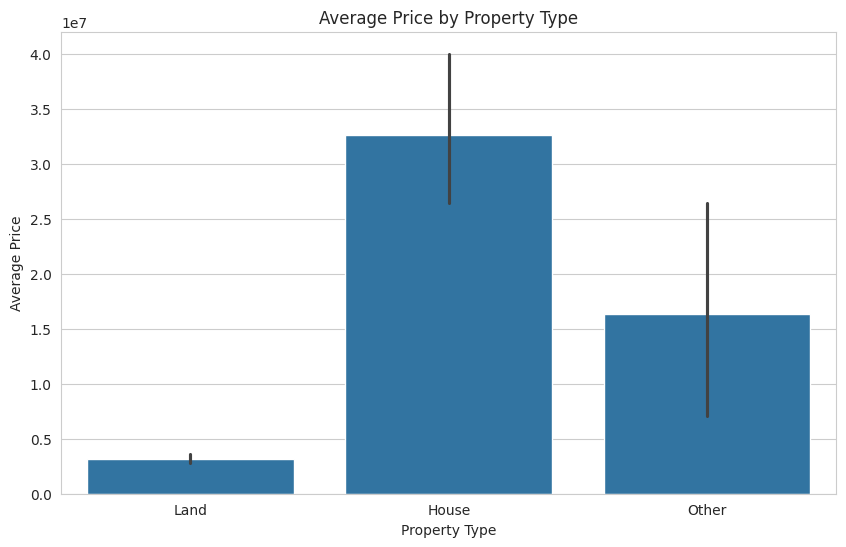

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Property_Type", data=df, y="Price")
plt.title("Average Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.show()


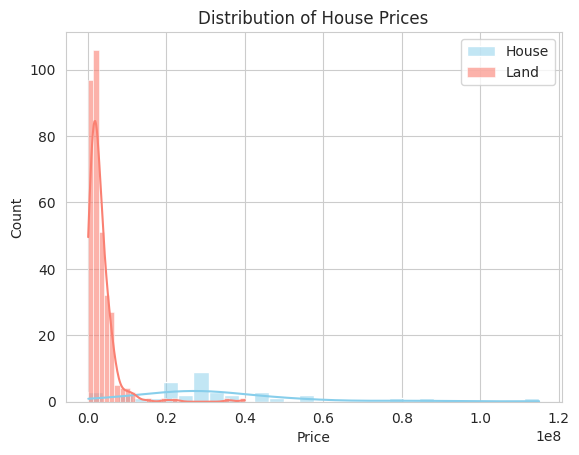

In [ ]:
houses = df[df["Property_Type"] == "House"]
lands = df[df["Property_Type"] == "Land"]


sns.histplot(houses["Price"], bins=30,color="skyblue", label='House', kde=True)
sns.histplot(lands["Price"], bins=30, color="salmon", label="Land", kde=True, alpha=0.6)
plt.title("Distribution of House Prices")
plt.legend()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

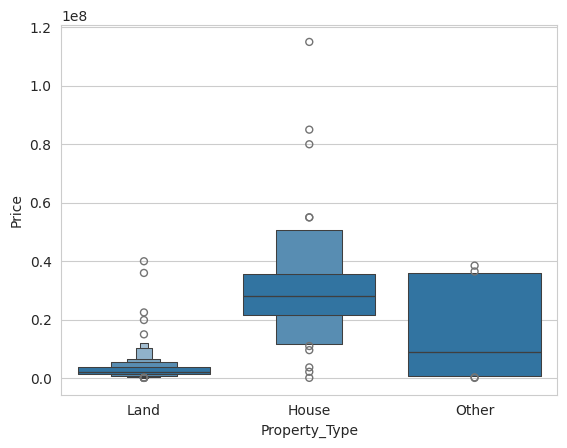

In [ ]:
sns.boxenplot(x="Property_Type", y="Price", data=df)
plt

In [ ]:
df["Address"].value_counts()

,count
Address,
Kathmandu,136
Lalitpur,83
Bhaktapur,27
2.5 Storey,18
Kaski,18
Kavrepalanchok,12
3.0 Storey,10
Chitwan,9
Makwanpur,7


/tmp/ipython-input-2519632389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


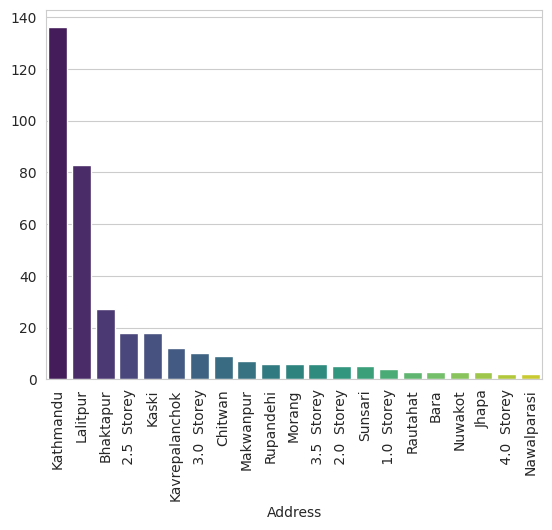

In [ ]:
location_counts = df["Address"].value_counts()
location_counts = location_counts[location_counts > 1]

sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xticks(rotation=90)

plt.show()